In [1]:
import pandas as pd
import numpy as np
from collections import Counter

In [2]:
df_train=pd.read_csv("../input/titanic/train.csv")
df_test=pd.read_csv("../input//titanic/test.csv")

In [3]:
print("The shape of the training data is"+str(df_train.shape))
print("The shape of the test data is"+str(df_test.shape))


The shape of the training data is(891, 12)
The shape of the test data is(418, 11)


In [4]:
#lets see what out data contains
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#lets check the number of missing values 
#Missing values in the data train is
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#Missing values in the data test is
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
#we will be changing the types of column of the training and test dataset
df_train["Sex"]=np.where(df_train["Sex"]=="male",1,0)

In [9]:
#we will be changing the types of column of the training and test dataset
df_test["Sex"]=np.where(df_test["Sex"]=="male",1,0)

In [10]:
df_train["Title"]=df_train["Name"].str.extract('([A-Za-z]+)\.',expand=False)
df_test["Title"]=df_test["Name"].str.extract('([A-Za-z]+)\.',expand=False)

In [11]:
df_train["Title"].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Ms            1
Countess      1
Lady          1
Capt          1
Don           1
Jonkheer      1
Mme           1
Sir           1
Name: Title, dtype: int64

In [12]:
df_test["Title"].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dr          1
Ms          1
Dona        1
Name: Title, dtype: int64

In [13]:
mapping={"Mr":0,"Miss":1,"Mrs":2,"Master":3,"Dr":3,"Rev":3,"Mlle":3,"Col":3,"Major":3,
         "Capt":3,"Sir":3,"Ms":3,"Jonkheer":3,"Mme":3,"Countess":3,
         "Don":3,"Lady":3}


In [14]:
for values in df_test:
    df_train["title"]=df_train["Title"].map(mapping)

    
for values in df_test:
    df_test["title"]=df_test["Title"].map(mapping)
    

In [15]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr,0


Text(0.5, 1.0, 'Title vs graph')

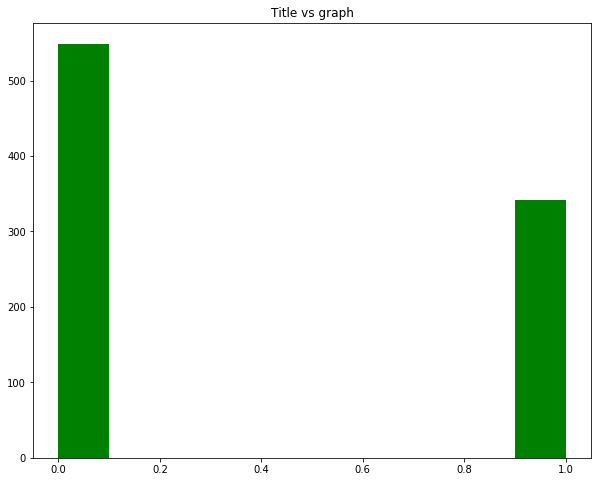

In [16]:
#now lets see the title relationship with the survived data
import seaborn as sns
my_colors = ['g']
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.hist(df_train["Survived"],color=my_colors)
plt.title("Title vs graph")


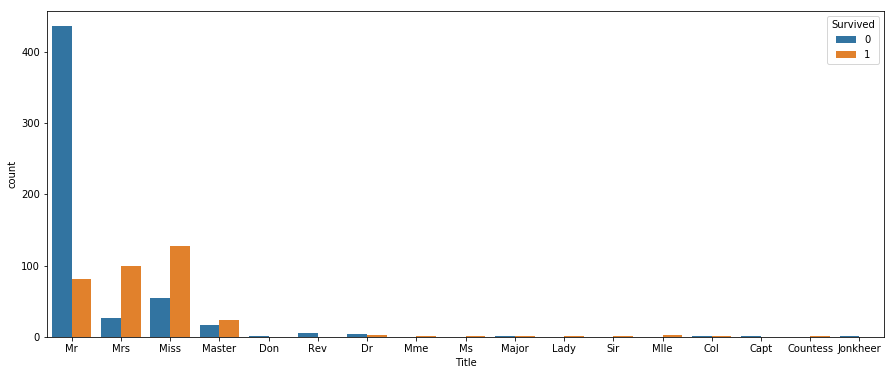

In [17]:
#by the means of this count plot we have seen that the survivors are in domination in female 
plt.figure(figsize=(15,6))
sns.countplot(df_train["Title"], hue=df_train['Survived'])

In [18]:
#lets drop the names now
df_train.drop(["Name"],axis=1,inplace=True)
df_test.drop(["Name"],axis=1,inplace=True)

In [19]:
x=df_train[df_train["Sex"]==0]
x=x[x["Survived"]==1]

In [20]:
y=df_train[df_train["Sex"]==1]
y=y[y["Survived"]==1]

Text(0.5, 1.0, 'Total number of females are314 males are577')

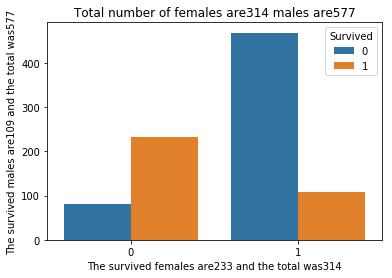

In [21]:
#lets check the male and female survivors
sns.countplot(df_train["Sex"],hue=df_train["Survived"])
plt.xlabel("The survived females are"+str(x.shape[0]) +" and the total was"+str(df_train["Sex"].value_counts()[0]))
plt.ylabel("The survived males are"+str(y.shape[0]) +" and the total was"+str(df_train["Sex"].value_counts()[1]))

plt.title("Total number of females are"+str(df_train["Sex"].value_counts()[0])+" " +"males are"+str(df_train["Sex"].value_counts()[1]) )


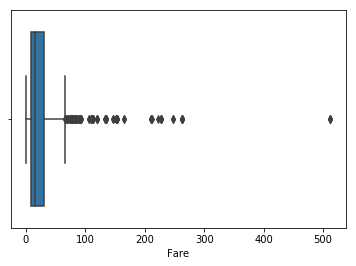

In [22]:
#lets drop the outliers for now
sns.boxplot(df_train["Fare"])

In [23]:
#getting the quantiles for 25 and 75 percentile
#Quantile1=np.percentile(df_train["Fare"],25)
#Quantile3=np.percentile(df_train["Fare"],75)
#IQR
#IQR=Quantile3-Quantile1
#Outliers_steps=1.5*IQR
#Outlier_indices=df_train[df_train["Fare"]<(Quantile1-Outliers_steps)]
#Outlier_indices1=df_train[df_train["Fare"]>(Quantile1+Outliers_steps)]
#print(Outliers_steps)

In [24]:
def outlier_detection(dataframe_to_check,number_of_total_outliers,list_of_features):
    index_of_outliers=[]
    for col in list_of_features:
        Quantile1=np.percentile(dataframe_to_check[col],25)
        Quantile3=np.percentile(dataframe_to_check[col],75)
        IQR=Quantile3-Quantile1
        outlier_factor=1.5*IQR
        outlier_list = dataframe_to_check[(dataframe_to_check[col] < Quantile1 - outlier_factor) | (dataframe_to_check[col] > Quantile3 + outlier_factor)].index
        #outlier_list=dataframe_to_check[dataframe_to_check[col]<(Quantile1-outlier_factor)| 
         #                               dataframe_to_check[col]>(Quantile3+outlier_factor)].index
        index_of_outliers.extend(outlier_list)
    
    index_of_outliers = Counter(index_of_outliers)        
    multiple_outliers = list( k for k, v in index_of_outliers.items() if v > number_of_total_outliers )
    return multiple_outliers



In [25]:
#Quantile1=np.percentile(Outlier_indices1["Fare"],25)
#Quantile3=np.percentile(Outlier_indices1["Fare"],75)
#IQR
#IQR=Quantile3-Quantile1
#Outliers_steps1=1.5*IQR
#Outliers_steps1
#Outlier_indices11=Outlier_indices1[Outlier_indices1["Fare"]<(Quantile1-Outliers_steps)]
#Outlier_indices111=Outlier_indices1[Outlier_indices1["Fare"]>(Quantile1+Outliers_steps)]

In [26]:
#seeing the outliers by row numbers
#for col in Outlier_indices111:
 #   print(df_train.loc[col])

In [27]:
#dropping the rows for outliers
#df_train.drop(inplace=True,index=Outlier_indices111)

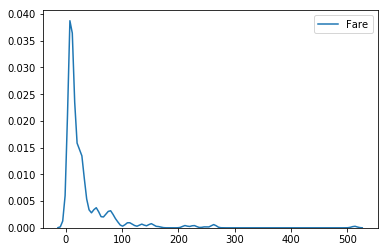

In [28]:
#this is the fare plot i.e the fare is maximum for 1-100 for normal ones
sns.kdeplot(df_train["Fare"])


<Figure size 720x576 with 0 Axes>

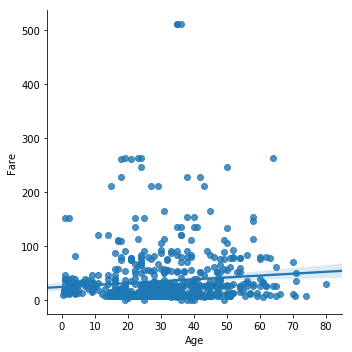

In [29]:
#by this graph we can see that the maximum crew on titanic was from the age band 
plt.figure(figsize=(10,8))
sns.lmplot(data=df_train,x="Age",y="Fare")
plt.show()

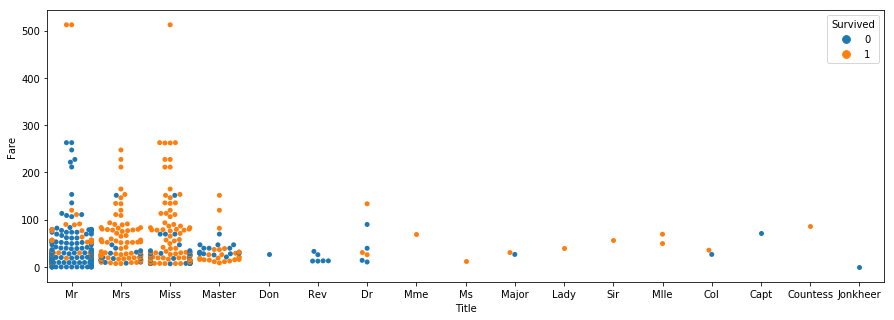

In [30]:

#by this graph we can see that the passengers are mostly man who have paid between 0-100$ and the ones who are survived
plt.figure(figsize=(15,5))
sns.swarmplot(df_train["Title"],df_train["Fare"],hue=df_train["Survived"])

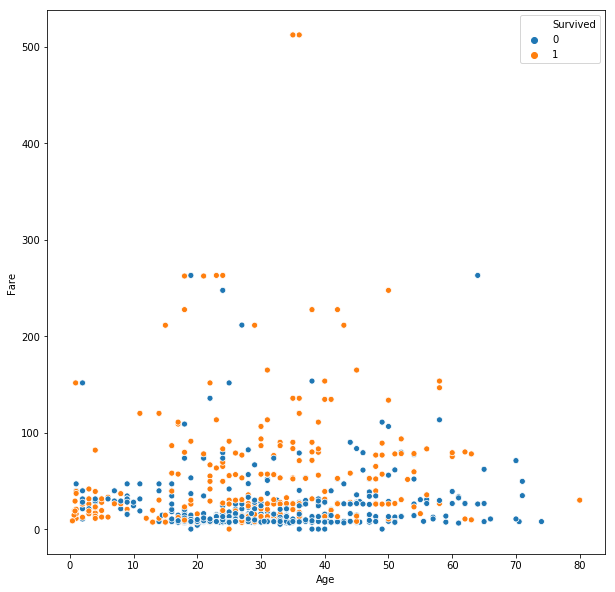

In [31]:
#lets check the dependency of fare vs age
plt.figure(figsize=(10,10))
sns.scatterplot(df_train["Age"],df_train["Fare"],hue=df_train["Survived"])

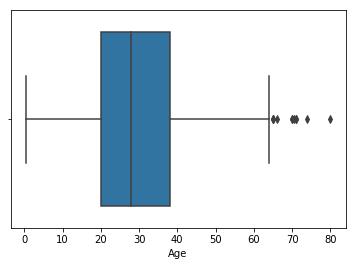

In [32]:
#checking the outliers for the age
sns.boxplot(df_train["Age"])

In [33]:
#checking the outliers in the age
#Quantile=np.percentile(df_train["Age"],25)

#Quantile3=np.percentile(df_train["Age"],75)
#IQR=Quantile3-Quantile1
#Outlier_factor=1.5*IQR

#outliers_lower=df_train[df_train["Age"]<(Quantile-Outlier_factor)]
#outliers_upper=df_train[df_train["Age"]>(Quantile3-Outlier_factor)]

In [34]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          891 non-null object
title          891 non-null int64
dtypes: float64(2), int64(7), object(4)
memory usage: 90.6+ KB


In [35]:
outliers_df1=outlier_detection(df_train,2,["Age","SibSp","Parch","Fare"])
outliers_df1

/opt/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


[27, 88, 159, 180, 201, 324, 341, 792, 846, 863]

In [36]:
#rows of the outliers
df_train.loc[outliers_df1]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,title
27,28,0,1,1,19.0,3,2,19950,263.00,C23 C25 C27,S,Mr,0
88,89,1,1,0,23.0,3,2,19950,263.00,C23 C25 C27,S,Miss,1
159,160,0,3,1,NaN,8,2,CA. 2343,69.55,NaN,S,Master,3
180,181,0,3,0,NaN,8,2,CA. 2343,69.55,NaN,S,Miss,1
201,202,0,3,1,NaN,8,2,CA. 2343,69.55,NaN,S,Mr,0
324,325,0,3,1,NaN,8,2,CA. 2343,69.55,NaN,S,Mr,0
341,342,1,1,0,24.0,3,2,19950,263.00,C23 C25 C27,S,Miss,1
792,793,0,3,0,NaN,8,2,CA. 2343,69.55,NaN,S,Miss,1
846,847,0,3,1,NaN,8,2,CA. 2343,69.55,NaN,S,Mr,0
863,864,0,3,0,NaN,8,2,CA. 2343,69.55,NaN,S,Miss,1


In [37]:
#now lets drop these rows which have more 2 or more than 2 outliers
df_train.drop(index=outliers_df1,inplace=True)

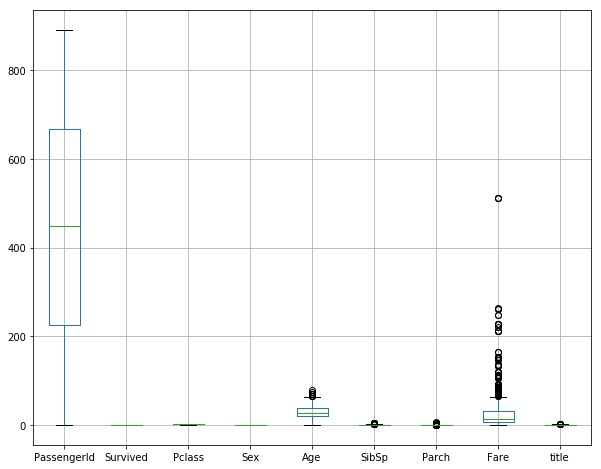

In [38]:
plt.figure(figsize=(10,8))
df_train.boxplot()

In [39]:
#lets see how our numeric data is related to other data
print(df_train[["Parch","Survived","SibSp","Age","Fare"]].corr())
#fare is the most effecting feature on the survival chances

             Parch  Survived     SibSp       Age      Fare
Parch     1.000000  0.092819  0.379281 -0.186457  0.183801
Survived  0.092819  1.000000  0.003330 -0.076867  0.264613
SibSp     0.379281  0.003330  1.000000 -0.307129  0.110072
Age      -0.186457 -0.076867 -0.307129  1.000000  0.110219
Fare      0.183801  0.264613  0.110072  0.110219  1.000000


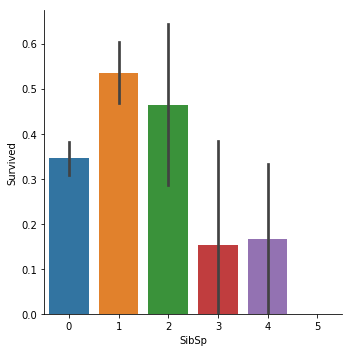

In [40]:
sns.catplot(x="SibSp",y="Survived",data=df_train,kind="bar")

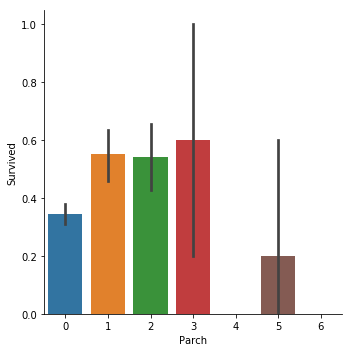

In [41]:
sns.catplot(x="Parch",y="Survived",data=df_train,kind="bar")

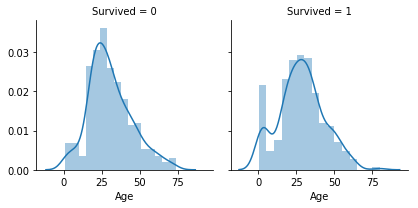

In [42]:
#for multiple plots 
g=sns.FacetGrid(df_train,col="Survived")
g=g.map(sns.distplot,"Age")
#the childrens have high chance of survival

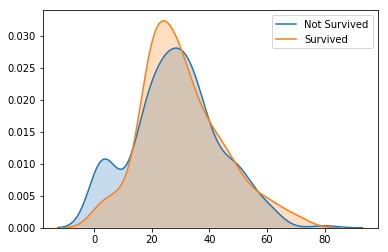

In [43]:
g=sns.kdeplot(df_train["Age"][(df_train["Survived"]==1)& (df_train["Age"].notnull())],shade=True)
g=sns.kdeplot(df_train["Age"][(df_train["Survived"]==0)& (df_train["Age"].notnull())],ax=g,shade=True)
g.legend(["Not Survived","Survived"])

In [44]:
df_train["data"],df_test["data"]="train","test"


In [45]:
final_df=pd.concat(objs=[df_train,df_test],axis=0).reset_index(drop=True)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [46]:
final_df.shape

(1299, 14)

In [47]:
final_df["Fare"].isnull().sum()
final_df["Fare"] = final_df["Fare"].fillna(final_df["Fare"].median())

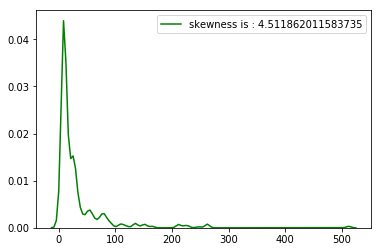

In [48]:
sns.kdeplot(final_df["Fare"],color='g',label="skewness is : "+str(final_df["Fare"].skew()))

In [49]:
#as we can see that the distribution is pareto so the scaling wont work for it
#lets transform it using log distribution
final_df["Fare"]=final_df["Fare"].map(lambda x: np.log(x) if x>0 else 0)

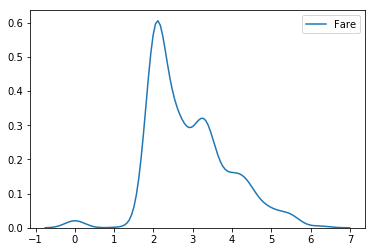

In [50]:
#now lets check the distribution of the Fare column
sns.kdeplot(final_df["Fare"])

In [51]:
df_train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
Title          False
title          False
data           False
dtype: bool

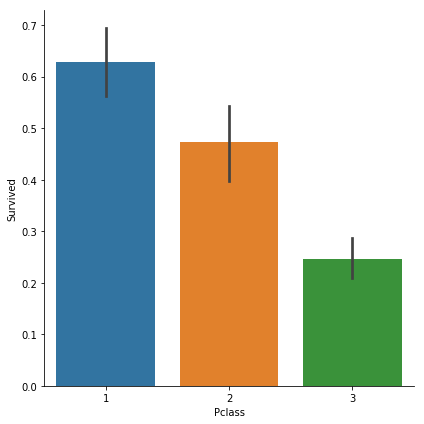

In [52]:
#now lets see how pclass effect the SUrvived

sns.catplot(y="Survived",x="Pclass",data=df_train,kind='bar',height=6)
#by seeing this graph we can clearly see that the class 1 passengers have high probability of survival

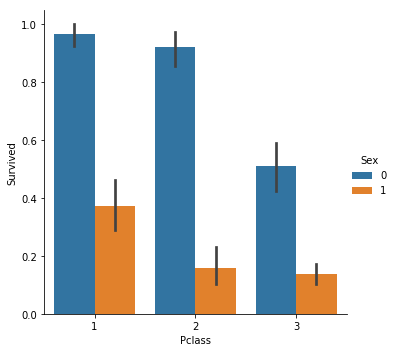

In [53]:
#lets check the passsenger class and the survival vs sex
sns.catplot(data=df_train,x="Pclass",y="Survived",hue="Sex",kind="bar")
#we can see here too even the female from lower classes have high chances of survival

In [54]:
#filled the na of the embarked column of the final dataframe
final_df["Embarked"]=final_df["Embarked"].fillna('S')

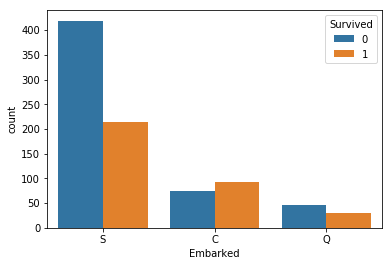

In [55]:
#lets plot the embarked with survived
sns.countplot(df_train["Embarked"],hue=df_train["Survived"])
#we can see that the Embarked 'C' class has the more survivors than the people who have not survived

In [56]:
#lets impute the missing values
#lets check the most co related features with the age
df_train.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,title
PassengerId,1.000000,-0.003089,-0.042702,0.046007,0.034172,-0.072042,0.004052,0.031211,-0.000887
Survived,-0.003089,1.000000,-0.334097,-0.546015,-0.076867,0.003330,0.092819,0.264613,0.449372
Pclass,-0.042702,-0.334097,1.000000,0.131245,-0.374495,0.065031,0.016440,-0.555558,-0.167340
Sex,0.046007,-0.546015,0.131245,1.000000,0.092778,-0.129308,-0.245750,-0.179277,-0.561477
Age,0.034172,-0.076867,-0.374495,0.092778,1.000000,-0.307129,-0.186457,0.110219,-0.149322
SibSp,-0.072042,0.003330,0.065031,-0.129308,-0.307129,1.000000,0.379281,0.110072,0.356980
Parch,0.004052,0.092819,0.016440,-0.245750,-0.186457,0.379281,1.000000,0.183801,0.349215
Fare,0.031211,0.264613,-0.555558,-0.179277,0.110219,0.110072,0.183801,1.000000,0.151219
title,-0.000887,0.449372,-0.167340,-0.561477,-0.149322,0.356980,0.349215,0.151219,1.000000


/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


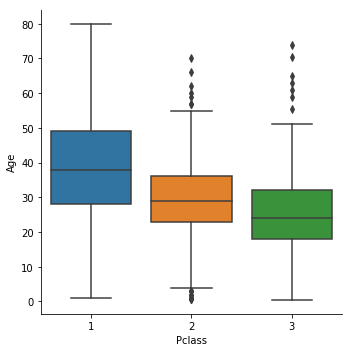

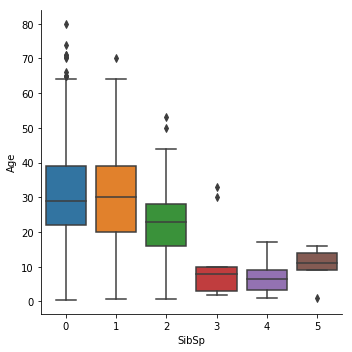

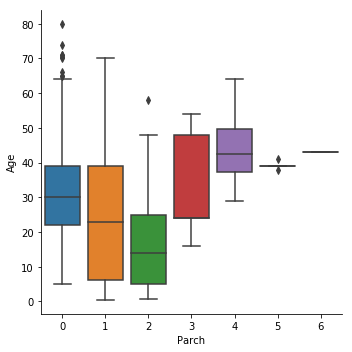

In [57]:
#INDEX	PassengerId	Survived	Pclass	Sex	Age	SibSp	Parch	Fare	title
#Age	0.034172	-0.076867	-0.374495	0.092778	1.000000	-0.307129	-0.186457	0.110219	-0.149322
#we will check the most co related features first
#1-Pclass- (-.3744)
#2-SibSp-(-0.307129)
#3-Parch-(-0.186457)
#now we will see the graph
g=sns.factorplot(kind="box",x="Pclass",y="Age",data=df_train)
g=sns.factorplot(data=df_train,x="SibSp",y="Age",kind='box')
g=sns.factorplot(data=df_train,x="Parch",y="Age",kind='box')

In [58]:
# Filling missing value of Age 

## Fill Age with the median age of similar rows according to Pclass, Parch and SibSp
# Index of NaN age rows
index_NaN_age = list(final_df["Age"][final_df["Age"].isnull()].index)


for i in index_NaN_age :
    age_med = final_df["Age"].median()
    age_pred = final_df["Age"][((final_df['SibSp'] == final_df.iloc[i]["SibSp"]) & (final_df['Parch'] == 
                                                                                    final_df.iloc[i]["Parch"]) & 
                                (final_df['Pclass'] == final_df.iloc[i]["Pclass"]))].median()
    if not np.isnan(age_pred) :
        final_df['Age'].iloc[i] = age_pred
    else :
        final_df['Age'].iloc[i] = age_med

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


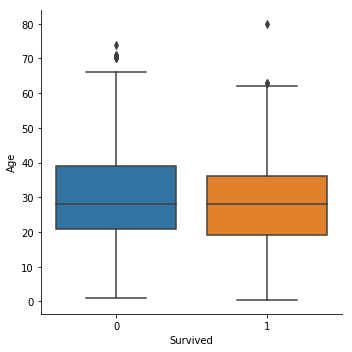

In [59]:
sns.factorplot(x="Survived",y="Age",data=df_train,kind='box')
#the people of young age has high chance of survival

In [60]:
#feature engineering
# Create a family size descriptor from SibSp and Parch
final_df["Fsize"] = final_df["SibSp"] + final_df["Parch"] + 1

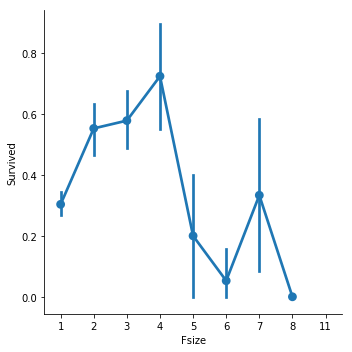

In [61]:
sns.factorplot(x="Fsize",y="Survived",data=final_df)

In [62]:
#creating some of the columns for which size of the family
final_df["Single"]=final_df["Fsize"].map(lambda s:1 if s==1 else 0)

final_df["SmallF"]=final_df["Fsize"].map(lambda s:1 if s==2 else 0)

final_df["MedF"]=final_df["Fsize"].map(lambda s:1 if 3 <= s <= 4 else 0)

final_df["Large"]=final_df["Fsize"].map(lambda s:1 if s>=5 else 0)

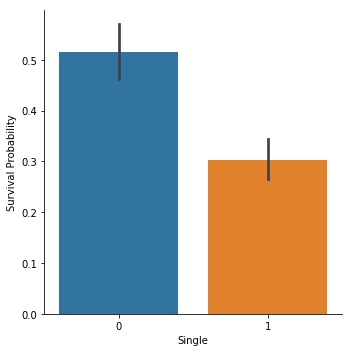

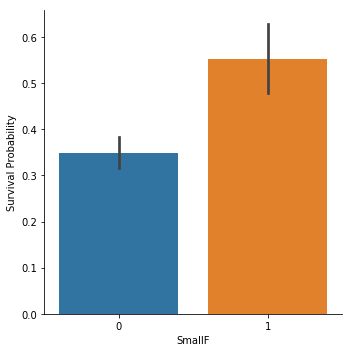

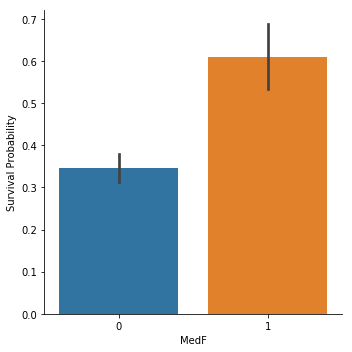

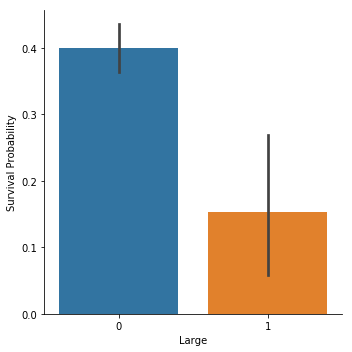

In [63]:
g = sns.factorplot(x="Single",y="Survived",data=final_df,kind="bar")
g = g.set_ylabels("Survival Probability")
g = sns.factorplot(x="SmallF",y="Survived",data=final_df,kind="bar")
g = g.set_ylabels("Survival Probability")
g = sns.factorplot(x="MedF",y="Survived",data=final_df,kind="bar")
g = g.set_ylabels("Survival Probability")
g = sns.factorplot(x="Large",y="Survived",data=final_df,kind="bar")
g = g.set_ylabels("Survival Probability")

In [64]:
final_df = pd.get_dummies(final_df, columns = ["Embarked"], prefix="Em")

In [65]:
final_df.head(5)

,Age,Cabin,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,...,data,title,Fsize,Single,SmallF,MedF,Large,Em_C,Em_Q,Em_S
0,22.0,NaN,1.981001,0,1,3,1,1,0.0,A/5 21171,...,train,0.0,2,0,1,0,0,0,0,1
1,38.0,C85,4.266662,0,2,1,0,1,1.0,PC 17599,...,train,2.0,2,0,1,0,0,1,0,0
2,26.0,NaN,2.070022,0,3,3,0,0,1.0,STON/O2. 3101282,...,train,1.0,1,1,0,0,0,0,0,1
3,35.0,C123,3.972177,0,4,1,0,1,1.0,113803,...,train,2.0,2,0,1,0,0,0,0,1
4,35.0,NaN,2.085672,0,5,3,1,0,0.0,373450,...,train,0.0,1,1,0,0,0,0,0,1


In [66]:
final_df["Cabin"].describe()

count                 292
unique                186
top       B57 B59 B63 B66
freq                    5
Name: Cabin, dtype: object

In [67]:
#filling thenull values with X as this might be indicating the people who do not have any cabin alloted
final_df["Cabin"]=final_df["Cabin"].fillna("X")

In [68]:
#we are extracting the string first element that will be the cabin code
final_df["Cabin"]=final_df["Cabin"].str[0]


In [69]:
final_df["Cabin"].value_counts()

X    1007
C      91
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin, dtype: int64

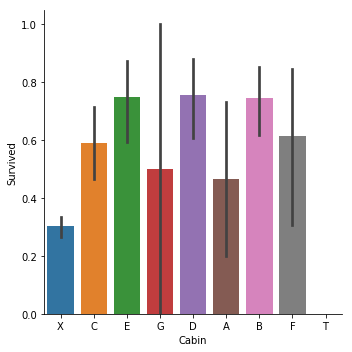

In [70]:
#plotting the cabins with survived
sns.factorplot(x="Cabin",y="Survived",data=final_df,kind='bar')

In [71]:
final_df.columns

Index(['Age', 'Cabin', 'Fare', 'Parch', 'PassengerId', 'Pclass', 'Sex',
       'SibSp', 'Survived', 'Ticket', 'Title', 'data', 'title', 'Fsize',
       'Single', 'SmallF', 'MedF', 'Large', 'Em_C', 'Em_Q', 'Em_S'],
      dtype='object')

In [72]:
final_df["title"]=final_df["title"].fillna(0)

In [73]:
final_df=pd.get_dummies(final_df,columns=["Cabin"],prefix="Cabin")

In [74]:
final_df.columns

Index(['Age', 'Fare', 'Parch', 'PassengerId', 'Pclass', 'Sex', 'SibSp',
       'Survived', 'Ticket', 'Title', 'data', 'title', 'Fsize', 'Single',
       'SmallF', 'MedF', 'Large', 'Em_C', 'Em_Q', 'Em_S', 'Cabin_A', 'Cabin_B',
       'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T',
       'Cabin_X'],
      dtype='object')

In [75]:
final_df["Ticket"]=final_df["Ticket"].str[0]

In [76]:
final_df=pd.get_dummies(final_df,columns=["Ticket"],prefix="Ticket_")

In [77]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 44 columns):
Age            1299 non-null float64
Fare           1299 non-null float64
Parch          1299 non-null int64
PassengerId    1299 non-null int64
Pclass         1299 non-null int64
Sex            1299 non-null int64
SibSp          1299 non-null int64
Survived       881 non-null float64
Title          1299 non-null object
data           1299 non-null object
title          1299 non-null float64
Fsize          1299 non-null int64
Single         1299 non-null int64
SmallF         1299 non-null int64
MedF           1299 non-null int64
Large          1299 non-null int64
Em_C           1299 non-null uint8
Em_Q           1299 non-null uint8
Em_S           1299 non-null uint8
Cabin_A        1299 non-null uint8
Cabin_B        1299 non-null uint8
Cabin_C        1299 non-null uint8
Cabin_D        1299 non-null uint8
Cabin_E        1299 non-null uint8
Cabin_F        1299 non-null uint8
Cabin_G  

In [78]:
final_df.drop(["Title"],inplace=True,axis=1)

In [79]:
final_df["data"].value_counts()

train    881
test     418
Name: data, dtype: int64

In [80]:
df_training=final_df[final_df["data"]=="train"]
df_testing=final_df[final_df["data"]=="test"]



In [81]:
#x_train=df_training.drop(["PassengerId","Survived","data"],axis=1)
#y_train=df_training["Survived"]
x_test=df_testing.drop(["PassengerId","Survived","data"],axis=1)

In [82]:
#x_train.shape,y_train.shape,x_test.shape
#x_train.reset_index(inplace=True,drop=True)

#y_train.reset_index(inplace=True,drop=True)
#x_test.reset_index(inplace=True,drop=True)

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [84]:
final_train,final_validation=train_test_split(df_training,test_size=.2,random_state=43)

In [85]:
x_final_train=final_train.drop(["PassengerId","Survived","data"],axis=1)
y_final_train=final_train["Survived"]
x_final_validation=final_validation.drop(["PassengerId","Survived","data"],axis=1)
y_final_validation=final_validation["Survived"]

In [86]:
#model=LogisticRegression()
#model.fit(x_final_train,y_final_train)
from sklearn.model_selection import KFold,StratifiedKFold

In [87]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)

In [88]:
from sklearn.metrics import auc
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier,RandomForestClassifier
from xgboost import XGBClassifier,XGBRFClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

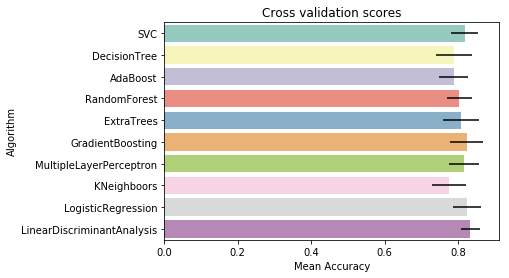

In [89]:
# Modeling step Test differents algorithms 
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, x_final_train, y = y_final_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [90]:
# Adaboost
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsadaDTC.fit(x_final_train,y_final_train)

ada_best = gsadaDTC.best_estimator_

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 552 tasks      | elapsed:    2.6s
[Parallel(n_jobs=4)]: Done 1120 out of 1120 | elapsed:    5.0s finished
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [91]:
ada_best

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                       

In [92]:
gsadaDTC.best_score_

0.8125

In [93]:
#ExtraTrees 
ExtC = ExtraTreesClassifier()


## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsExtC.fit(x_final_train,y_final_train)

ExtC_best = gsExtC.best_estimator_

# Best score
gsExtC.best_score_

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   16.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   40.1s
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:   49.4s finished
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.828125

In [94]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(x_final_train,y_final_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.7s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   17.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   43.7s
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:   54.7s finished
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.8338068181818182

In [95]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(x_final_train,y_final_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    3.4s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   15.9s
[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:   30.4s finished
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.8309659090909091

In [96]:
### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsSVMC.fit(x_final_train,y_final_train)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   12.3s
[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed:   20.5s finished


0.828125

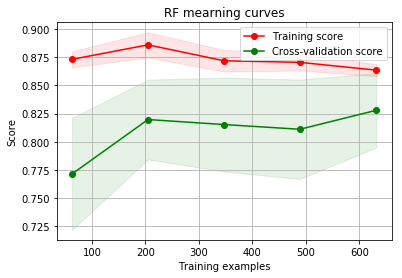

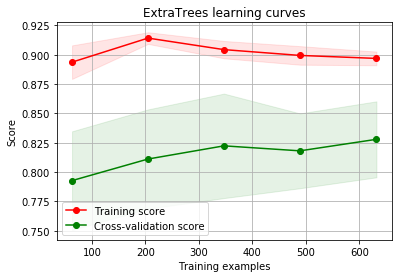

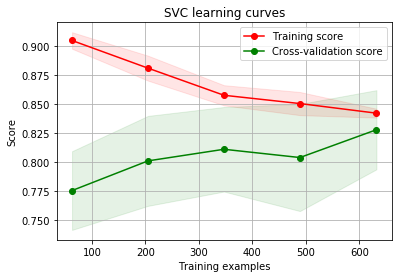

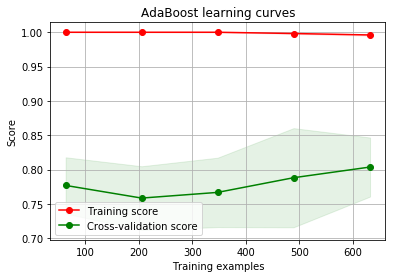

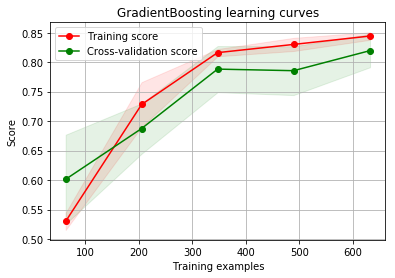

In [97]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

#GradientBoosting and Adaboost classifiers tend to overfit the training set. 
#According to the growing cross-validation curves GradientBoosting and Adaboost could perform better with more training examples.
#SVC and ExtraTrees classifiers seem to better generalize the prediction 
#since the training and cross-validation curves are close together.
g = plot_learning_curve(gsRFC.best_estimator_,"RF mearning curves",x_final_train,y_final_train,cv=kfold)
g = plot_learning_curve(gsExtC.best_estimator_,"ExtraTrees learning curves",x_final_train,y_final_train,cv=kfold)
g = plot_learning_curve(gsSVMC.best_estimator_,"SVC learning curves",x_final_train,y_final_train,cv=kfold)
g = plot_learning_curve(gsadaDTC.best_estimator_,"AdaBoost learning curves",x_final_train,y_final_train,cv=kfold)
g = plot_learning_curve(gsGBC.best_estimator_,"GradientBoosting learning curves",x_final_train,y_final_train,cv=kfold)

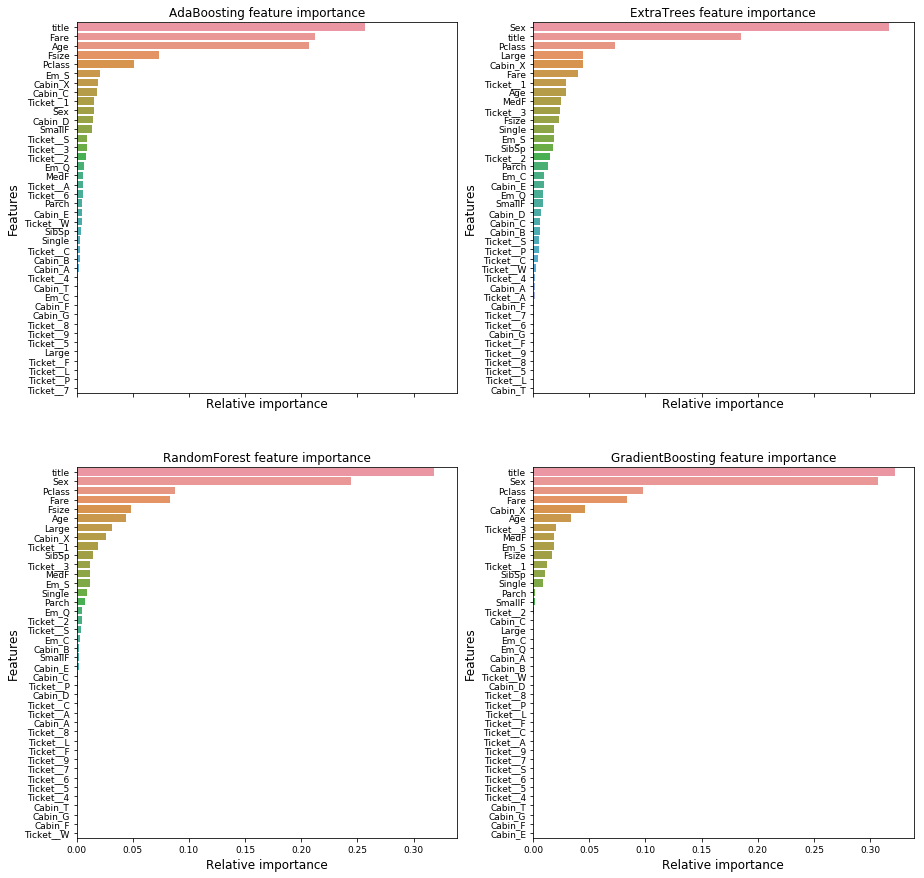

In [98]:
#Feature importance of tree based classifiers
#In order to see the most informative features for the prediction of passengers survival,
#Displayed the feature importance for the 4 tree based classifiers which are performing well and generalizing well
nrows = ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(15,15))

names_classifiers = [("AdaBoosting", ada_best),("ExtraTrees",ExtC_best),("RandomForest",RFC_best),("GradientBoosting",GBC_best)]

nclassifier = 0
for row in range(nrows):
    for col in range(ncols):
        name = names_classifiers[nclassifier][0]
        classifier = names_classifiers[nclassifier][1]
        indices = np.argsort(classifier.feature_importances_)[::-1][:40]
        g = sns.barplot(y=x_final_train.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h',ax=axes[row][col])
        g.set_xlabel("Relative importance",fontsize=12)
        g.set_ylabel("Features",fontsize=12)
        g.tick_params(labelsize=9)
        g.set_title(name + " feature importance")
        nclassifier += 1

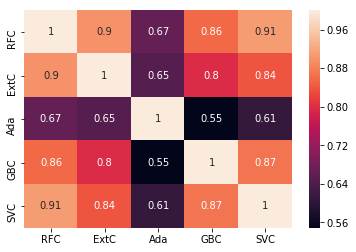

In [99]:
#getting the result on test data for the results
test_Survived_RFC = pd.Series(RFC_best.predict(x_test), name="RFC")
test_Survived_ExtC = pd.Series(ExtC_best.predict(x_test), name="ExtC")
test_Survived_SVMC = pd.Series(SVMC_best.predict(x_test), name="SVC")
test_Survived_AdaC = pd.Series(ada_best.predict(x_test), name="Ada")
test_Survived_GBC = pd.Series(GBC_best.predict(x_test), name="GBC")


# Concatenate all classifier results
ensemble_results = pd.concat([test_Survived_RFC,test_Survived_ExtC,test_Survived_AdaC,test_Survived_GBC, test_Survived_SVMC],axis=1)


g= sns.heatmap(ensemble_results.corr(),annot=True)

In [100]:
x_train_full=df_training.drop(["PassengerId","data","Survived"],axis=1)
y_train_full=df_training["Survived"]
x_train_full.shape,y_train_full.shape

((881, 40), (881,))

In [101]:
#I choosed a voting classifier to combine the predictions coming from the 5 classifiers.
votingC = VotingClassifier(estimators=[('rfc', RFC_best), ('extc', ExtC_best),
('svc', SVMC_best), ('adac',ada_best),('gbc',GBC_best)], voting='soft', n_jobs=4)
#traing the algorithm on the basis of the full data
votingC = votingC.fit(x_train_full,y_train_full)

In [102]:
df_test.head(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,title,data
0,892,3,1,34.5,0,0,330911,7.8292,NaN,Q,Mr,0.0,test
1,893,3,0,47.0,1,0,363272,7.0000,NaN,S,Mrs,2.0,test
2,894,2,1,62.0,0,0,240276,9.6875,NaN,Q,Mr,0.0,test
3,895,3,1,27.0,0,0,315154,8.6625,NaN,S,Mr,0.0,test
4,896,3,0,22.0,1,1,3101298,12.2875,NaN,S,Mrs,2.0,test


In [103]:
test_Survived = pd.Series(votingC.predict(x_test), name="Survived")
results = pd.concat([df_test["PassengerId"],test_Survived],axis=1)
results.to_csv("ensemble_python_voting.csv",index=False)